In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

In [3]:
df = pd.read_csv("iris-3.csv")

In [4]:
df.head()

,x1,x2,x3,x4,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   x3      150 non-null    float64
 3   x4      150 non-null    float64
 4   type    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


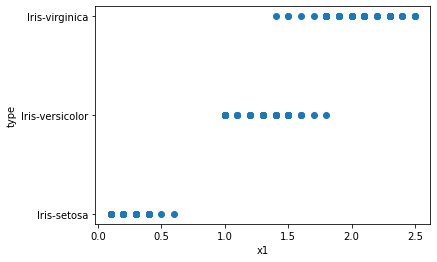

In [11]:
plt.scatter(df['x4'], df['type'])
plt.xlabel('x1')
plt.ylabel('type')
plt.show()

In [12]:
X = df[['x1','x2','x3','x4']]

In [13]:
y = df['type']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = .3)

In [16]:
X_train

,x1,x2,x3,x4
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [17]:
y_train

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: type, Length: 105, dtype: object

In [18]:
from sklearn.svm import SVC

In [19]:
svc_linear = SVC(kernel = 'linear',random_state = 0)

In [20]:
svc_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = svc_linear.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [27]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = svc_linear, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc.std()*100))

Accuracy: 95.36 %
Standard Deviation: 6.17 %


In [28]:
svc_rbf = SVC(kernel = 'rbf',random_state = 0)

In [30]:
svc_rbf.fit(X_train,y_train)

SVC(random_state=0)

In [32]:
y_pred = svc_rbf.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [34]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = svc_linear, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc.std()*100))

Accuracy: 95.36 %
Standard Deviation: 6.17 %


As shown in the demonstration above, I have used Support Vector Machine to classify the iris dataset. I used Linear SVC first and then used RBF SVC. 
Both gave the same accuracy and classified all the test data correctly.
I have used the random state of 42 for train test splitting and random state of 0 for both the SVM classifiers.
The confusion matrix in both the cases shows all the data being classified perfectly.